<a href="https://colab.research.google.com/github/mesogin/TIS2/blob/main/3_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%EA%B3%BC_%EB%AA%A8%EB%8D%B8%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학과 규제


###다중 회귀
여러 개의 특성을 사용한 선형 회귀를 다중 회귀라고 부른다.  
하나의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선, 특성이 2개면 선형 회귀는 평면을 학습한다.  
"농어 길이 x 농어 높이" 를 새로운 특성으로 만듦, 이렇게 기존의 특성을 사용하여 새로운 특성을 만들어 내는 작업을 **특성 공학(feature engineering)**이라고 한다.

###사이킷런의 변환기
사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공한다. 사이킷런에서는 이런 클래스를 변환기 라고 부른다.  
변환기 클래스는 fit(), transform()메서드를 제공한다.

In [ ]:
# 농어 데이터를 다시 불러옴
# 이번에는 판다스를 이용하여 인테넷 상의 파일을 불러옴

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data') # read_csv() 함수로 데이터프레임을 만듦
print(df)
perch_full = df.to_numpy() # to_numpy() 메서드로 넘파이 배열로 전환. df.values 속성과 동일
print(perch_full)

In [20]:
# 이전과 같은 방식으로 타깃 데이터 준비

import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

여기서 잠깐: transform 전에 꼭 poly.fit을 사용해야 하나? 훈련을 해야 변환이 가능함. 사이킷런은 일관된 api 때문에 두 단계로 나뉘어져 있음. 두 메서드를 하나로 붙인 fit_transform 메서드도 있음

특성이 아주 많아짐. PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가함. 2와 3을 각기 제곱한 4와 9가 추가되었고, 2와 3을 곱한 6이 추가됨. 그런데 1은 왜 추가되었을까? 다음 식을 보라.

무게 = a x 길이 + b x 높이 + c x 두께 + d x 1

사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있음. 이렇게 보면 특성은 (길이, 높이, 두께, 1)이 됨. 하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없음. include_bias = False로 지정하여 다시 특성을 변환.

In [23]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


In [24]:
#9개의 특성이 어떤 입력 조합으로 만들어졌는지 알려줌
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [25]:
#테스트 세트 변환
test_poly = poly.transform(test_input)

###다중회귀모델 훈련하기

In [26]:
#훈련세트 훈련후 점수확인
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [27]:
# 테스트 세트에 대한 점수도 확인

print(lr.score(test_poly, test_target))

0.9714559911594133


#StandardScaler클래스

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly) # 훈련세트로 훈련

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 릿지(Ridge)와 라쏘(Lasso)라고 부름.  
릿지는 계수를 제곱한 값을 기준으로 규제를 적용한다.  
라쏘는 계수의 절대값을 기준으로 구제를 적용한다.

###릿지 회귀

In [29]:
#릿지 회귀를 활용해 훈련시키고 점수확인
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

#테스트 점수확인
print(ridge.score(test_scaled, test_target))

0.9857915060511934
0.9835057194929057


릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절할 수 있다.  

 alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도함. 반대로 alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 큼.  
  
alpha값은 릿지 모델이 학습하는 값이 아니라 우리가 지정해야하는 값이다.  
이렇게 머신러닝 모델이 학습할 수 없고, 사람이 직접 지정해야하는 파라미터를 하이퍼파라미터라고 부른다.

In [30]:
import matplotlib.pyplot as plt

# alpha값이 바뀔 때마다 score() 메서드의 결과를 저장할 리스트를 만듦
train_score = []
test_score = []

In [31]:
# alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음
# 훈련 세트와 테스트 세트의 점수를 리스트에 저장

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_list:
    # 릿지 모델을 만듦
    ridge = Ridge(alpha=i)
    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

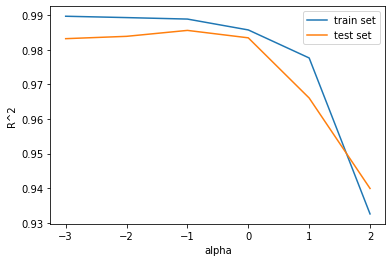

In [32]:
# alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현

plt.plot(np.log10(alpha_list), train_score, label="train set")
plt.plot(np.log10(alpha_list), test_score, label="test set")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()